# Decision Trees Lab

In this lab we will discover how to apply decision trees to regression and classification problems.

In [2]:
# import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# read in vehicle data
v = pd.read_csv('../../assets/datasets/used_cars.csv')

### 1: Build a classification tree

How do you build a decision tree? You're going to find out by building one in pairs!

Your training data is a tiny dataset of [used vehicle sale prices](../../assets/datasets/used_cars.csv). Your goal is to predict the price of a car. Here are your instructions:

1. Read the data into Pandas.
- Explore the data by sorting, plotting, or split-apply-combine (aka `group_by`).
- Get the median value of 'price.' Create a binary column that indicates if the price is above or below the median. 
- Decide which feature is the most important predictor, and use that to make your first split. (Only binary splits are allowed!)
- After making your first split, you should actually split your data in Pandas into two parts, and then explore each part to figure out what other splits to make.
- Decide if you need additional splits along other features
- Stop making splits once you are convinced that it strikes a good balance between underfitting and overfitting. (As always, your goal is to build a model that generalizes well!)
- You are allowed to split on the same variable multiple times!
- Draw your tree on your desk, making sure to label your leaves with the car/truck prediction for the observations in that "bucket".
- When you're finished, review your tree to make sure nothing is backwards. (Remember: follow the left branch if the rule is true, and follow the right branch if the rule is false.)

In [3]:
v.head()

,price,year,miles,doors,type
0,22000,2012,13000,2,car
1,14000,2010,30000,2,car
2,13000,2010,73500,4,car
3,9500,2009,78000,4,car
4,9000,2007,47000,4,car


/Users/Rebecca/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


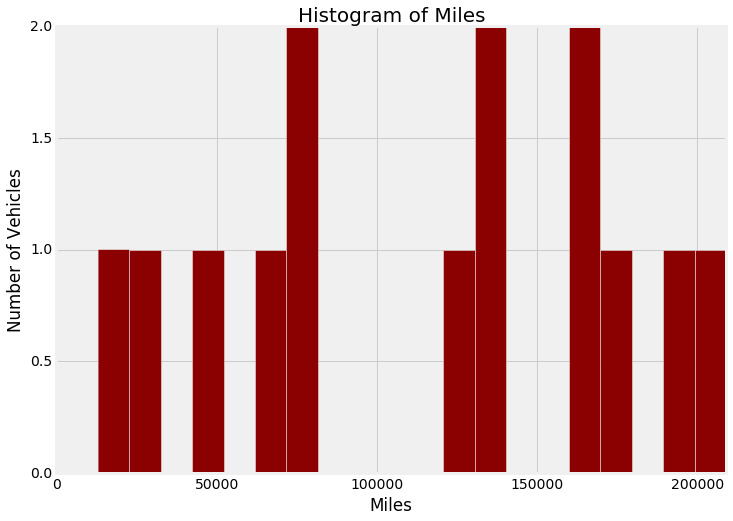

In [8]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

df_hist = plt.hist(v['miles'], color = 'darkred', bins = 20)

plt.title('Histogram of Miles', fontsize = 20)

# y label
plt.ylabel('Number of Vehicles')

# x label
plt.xlabel('Miles')

plt.xlim([0, max(v['miles'])])
#plt.ylim([-10, 85])

plt.legend(loc='upper right', fontsize = 15)

plt.show()

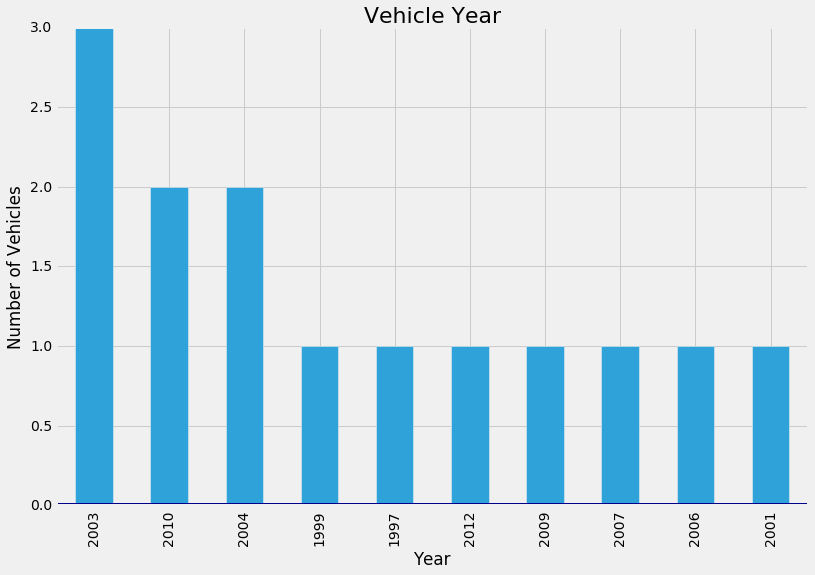

In [9]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

year = v['year'].value_counts()

year.plot.bar()

plt.axhline(0, color='darkblue')

plt.title('Vehicle Year', fontsize = 22)

# y label
plt.ylabel('Number of Vehicles')

#ax.get_xaxis().get_major_formatter().set_useOffset(False)
# x label
plt.xlabel('Year')

#plt.legend(loc='upper right', fontsize = 15)

plt.show()

In [11]:
v['doors'].value_counts()

4    8
2    6
Name: doors, dtype: int64

In [13]:
v['type'].value_counts()

car      11
truck     3
Name: type, dtype: int64

In [5]:
median = float(v['price'].describe().loc['50%'])
median

3500.0

In [6]:
def price_dummify(x):
    price_dummy = []
    for i in v['price']:
        if i > median:
            price_dummy.append(1)
        elif i <= median:
            price_dummy.append(0)
        # This shouldn't happen, but just in case...
        else:
            price_dummy.append('NaN')
    x['price_dummy'] = price_dummy
    return 

In [7]:
price_dummify(v)
v.head()

,price,year,miles,doors,type,price_dummy
0,22000,2012,13000,2,car,1
1,14000,2010,30000,2,car,1
2,13000,2010,73500,4,car,1
3,9500,2009,78000,4,car,1
4,9000,2007,47000,4,car,1


#### How does a computer build a decision tree?

The ideal approach would be for the computer to consider every possible partition of the feature space. However, this is computationally infeasible, so instead an approach is used called **recursive binary splitting:**

- Begin at the top of the tree.
- For every single predictor, examine every possible cutpoint, and choose the predictor and cutpoint such that the resulting tree has the **highest purity**. Make that split.
- Repeat the examination for the two resulting regions, and again make a single split (in one of the regions) to minimize the MSE.
- Keep repeating this process until a stopping criteria is met.

**How does it know when to stop?**

1. We could define a stopping criterion, such as a **maximum depth** of the tree or the **minimum number of samples in the leaf**.
2. We could grow the tree deep, and then "prune" it back using a method such as "cost complexity pruning" (aka "weakest link pruning").

Method 2 involves setting a tuning parameter that penalizes the tree for having too many leaves. As the parameter is increased, branches automatically get pruned from the tree, resulting in smaller and smaller trees. The tuning parameter can be selected through cross-validation.

Note: **Method 2 is not currently supported by scikit-learn**, and so we will use Method 1 instead.

Note that classification trees easily handle **more than two response classes**! (How have other classification models we've seen handled this scenario?)




### 2: Build a regression tree in scikit-learn

Building a tree by hand was not so easy, and also not ideal. Let's use scikit-learn to build an optimal regression tree. Do the following:

- Check for missing values
- Map the `type` column to a binary variable
- Create a matrix `X` that contains the feature values and a vector `y` that contains the price values
- Split the data into train-test using a random state of 42 and test_size of 30%
- Import and initialize the `DecisionTreeClassifier` class from scikit-learn
- Fit it to the training set
- Predict the values of the test set
- Display the predicted and actual values in a confusion matrix
- Use score report to judge the goodness of the classification

In [18]:
def type_dummify(x):
    type_dummy = []
    for i in v['type']:
        if i == 'car':
            type_dummy.append(1)
        elif i == 'truck':
            type_dummy.append(0)
        # This shouldn't happen, but just in case...
        else:
            type_dummy.append('NaN')
    x['type_dummy'] = type_dummy
    return 

In [27]:
type_dummify(v)
v.head()
X = v[['year', 'miles', 'doors', 'type_dummy']]
X['intercept'] = 1
y = pd.DataFrame(v['price'])

/Users/Rebecca/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [28]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# After you've cleaned and split the data, run this model:
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)
treereg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=1,
           splitter='best')

In [30]:
predictions = treereg.predict(X)

cm = confusion_matrix(y, predictions)

In [31]:
### And a function to plot your confusion matrix:
import matplotlib.patheffects as path_effects
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, title='Confusion matrix', labels=['Positive','Negative'], cmap=plt.cm.Blues):
    
    plt.figure(figsize=(7,7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)
        
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
    width, height = cm.shape
    
    for x in xrange(width):
        for y in xrange(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center',
                        color = 'white',
                        fontsize=18).set_path_effects([path_effects.Stroke(linewidth=1, foreground='black'),
                                                       path_effects.Normal()]) #The last line here adds a text outline
    plt.show()
    return

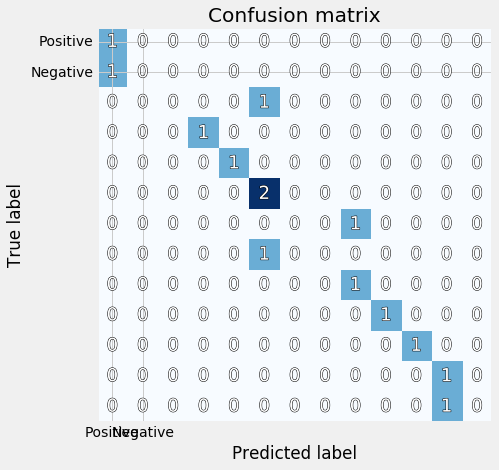

In [32]:
plot_confusion_matrix(cm, title='Confusion matrix', labels=['Positive','Negative'], cmap=plt.cm.Blues)

### 3.b Global parameters

The `DecisionTreeClassifier` offers few global parameters that can be changed at initialization. For example one can set the `max_depth` or the `min_samples_leaf` parameters and impose global constraints on the space of solutions.

1. Use `cross_val_score` with 3-fold cross validation to find the optimal value for the `max_depth` (explore values 1 - 10). Always set `random_state=1`
- Plot the error as a function of `max_depth`

In [ ]:
X.head()

In [16]:
PARAMETERS = {'max_depth':[1,2,3,4,5,6], 'max_features':[1,2,3,4], 'max_leaf_nodes':[5,6,7,8,9,10], 'min_samples_leaf':\
             [1,2,3,4], 'min_samples_split':[1,2,3,4]}

In [ ]:
from sklearn import 

## 3.c Feature importances

The decision tree class exposes an attribute called `feature_importances_`.

1. Check the importance of each feature. what's the most important feature?

### 3.d Tree visualization

Follow the example in the [documentation](http://scikit-learn.org/stable/modules/tree.html) to visualize the tree.
You may have to install `pydotplus` and/or `graphviz` if you don't have them already.

Note: `pydot` and `pydotplus` are interchangeable. `pydotplus` tends to have fewer errors, so use that if `pydot` isn't working.

In [17]:
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus

dot_data = StringIO()
export_graphviz(treereg, out_file=dot_data,  
                feature_names=X.columns,  
                filled=True, rounded=True,  
                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

NameError: name 'treereg' is not defined

#### Interpreting a tree diagram

How do we read this decision tree?

**Internal nodes:**

- `samples` is the number of observations in that node before splitting
- `mse` is the mean squared error calculated by comparing the actual response values in that node against the mean response value in that node
- First line is the condition used to split that node (go left if true, go right if false)

**Leaves:**

- `gini` is a measure of purity
- `samples` is the number of observations in that node
- `value` is the mean response value in that node
- [For regression: `mse` is the mean squared error calculated by comparing the actual response values in that node against "value"]

### Exercise 4: Use GridSearchCV to find the best Tree

How do we know by pruning with max depth is the best model for us? Trees offer a variety of ways to pre-prune (that is, we tell a computer how to design the resulting tree with certain "gotchas").

Measure           | What it does
------------------|-------------
max_depth         | How many nodes deep can the decision tree go?
max_features      | Is there a cut off to the number of features to use?
max_leaf_nodes    | How many leaves can be generated per node?
min_samples_leaf  | How many samples need to be included at a leaf, at a minimum?  
min_samples_split | How many samples need to be included at a node, at a minimum?

1. Initialize reasonable ranges for all parameters and find the optimal combination using Grid Search.

## 4 Regression trees

Classification trees are very similar to regression trees. Here is a quick comparison:

|regression trees|classification trees|
|---|---|
|predict a continuous response|predict a categorical response|
|predict using mean response of each leaf|predict using most commonly occuring class of each leaf|
|splits are chosen to minimize MSE|splits are chosen to minimize a different criterion (discussed below)|



#### How does a computer build a regression tree?
Just like for a classification tree, it uses **recursive binary search**, but optimizes for lowest MSE instead of purity:

- Begin at the top of the tree.
- For every single predictor, examine every possible cutpoint, and choose the predictor and cutpoint such that the resulting tree has the **lowest possible mean squared error (MSE)**. Make that split.
- Repeat the examination for the two resulting regions, and again make a single split (in one of the regions) to minimize the MSE.
- Keep repeating this process until a stopping criteria is met.

In [ ]:
##type OK in a comment here. Just to make sure you're following along.

### 4a: Build a regression tree in scikit-learn

Building a tree by hand was not so easy, and also not ideal. Let's use scikit-learn to build an optimal regression tree. Do the following:

- Check for missing values
- Map the `type` column to a binary variable
- Create a matrix `X` that contains the feature values and a vector `y` that contains the price values
- Split the data into train-test using a random state of 42 and test_size of 30%
- Import and initialize the `DecisionTreeRegressor` class from scikit-learn with `max_depth=3` and `criterion = 'mse'`
- Fit it to all the data
- Use r2_score to judge the goodness of the regression
- Release the constraint of `max_depth=3` and see if the regression improves

## Bonus

Visualize the last tree. Can you make sense of it? What does this teach you about decision tree interpretability?
